In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\NETFLIX data analysis\netflix1.csv")
df.head

<bound method NDFrame.head of      show_id     type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               YOM        Not Given   

            country  date_added  release_year rating   du

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [4]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [7]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [8]:
df.drop_duplicates(inplace= True)

In [11]:
df.dropna(subset = ['director', 'listed_in', 'date_added'], inplace=True)

In [20]:
df['date_added'] = pd.to_datetime(df['date_added'])
df.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

In [17]:
df.shape

(8790, 10)

In [22]:
type_count= df['type'].value_counts()
print (type_count)

type
Movie      6126
TV Show    2664
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4628\650241933.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_count.index, y=type_count.values, palette=['lightgreen', 'lightblue'])


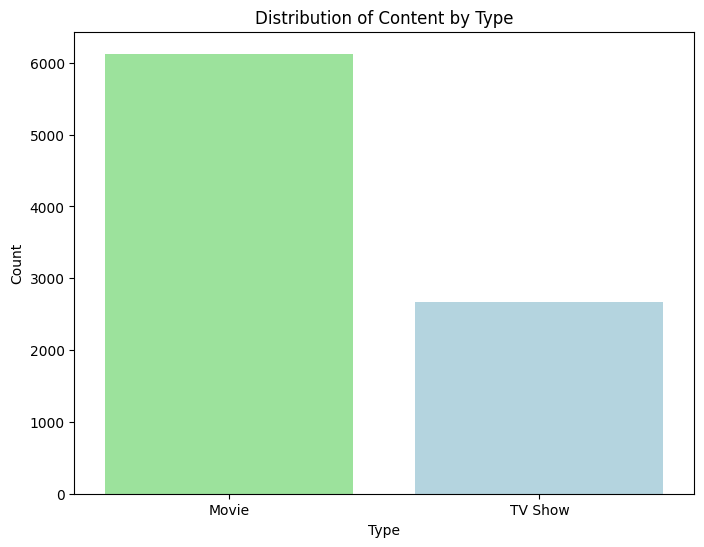

In [42]:
plt.figure(figsize=(8, 6))
sns.barplot(x=type_count.index, y=type_count.values, palette=['lightgreen', 'lightblue'])
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4628\3739777632.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette=['pink', 'purple', 'black', 'grey', 'lightblue'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4628\3739777632.py:5: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette=['pink', 'purple', 'black', 'grey', 'lightblue'])


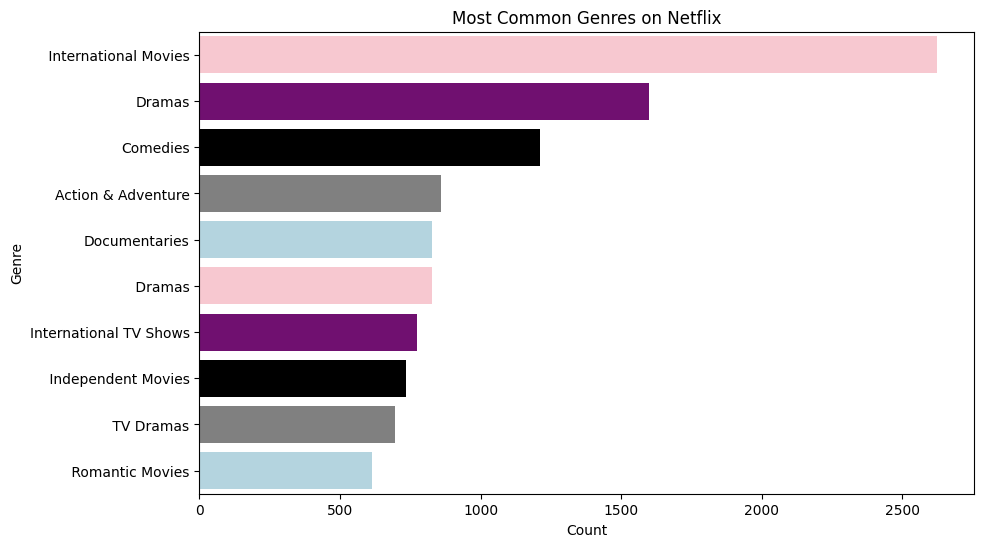

In [43]:
df['genres'] = df['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(df['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette=['pink', 'purple', 'black', 'grey', 'lightblue'])
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()